In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [16]:

df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [20]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1,1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB


In [22]:

df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [25]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.58,1.69,1.66,1.39,1.26,1.14,1.10,1.12,1.19,1.20,1.58,1.18,1.34,1.36,1.56,1.44,1.12,1.32
2021,1.25,0.95,1.20,1.12,1.04,1.20,1.07,1.02,1.04,1.29,1.29,1.16,1.14,1.14,1.13,1.12,1.10,1.21
2022,1.24,1.16,1.41,1.08,1.02,1.12,1.06,1.16,1.14,1.31,1.09,1.06,1.15,1.16,1.19,1.17,1.11,1.18
2023,1.29,1.29,1.63,1.01,1.12,1.19,1.44,1.57,1.67,1.88,1.97,1.85,1.49,1.43,1.21,1.26,1.40,1.84
2024,1.66,1.93,1.77,1.79,1.44,1.54,1.42,1.42,1.57,NaN,NaN,NaN,NaN,NaN,1.81,1.67,1.46,NaN


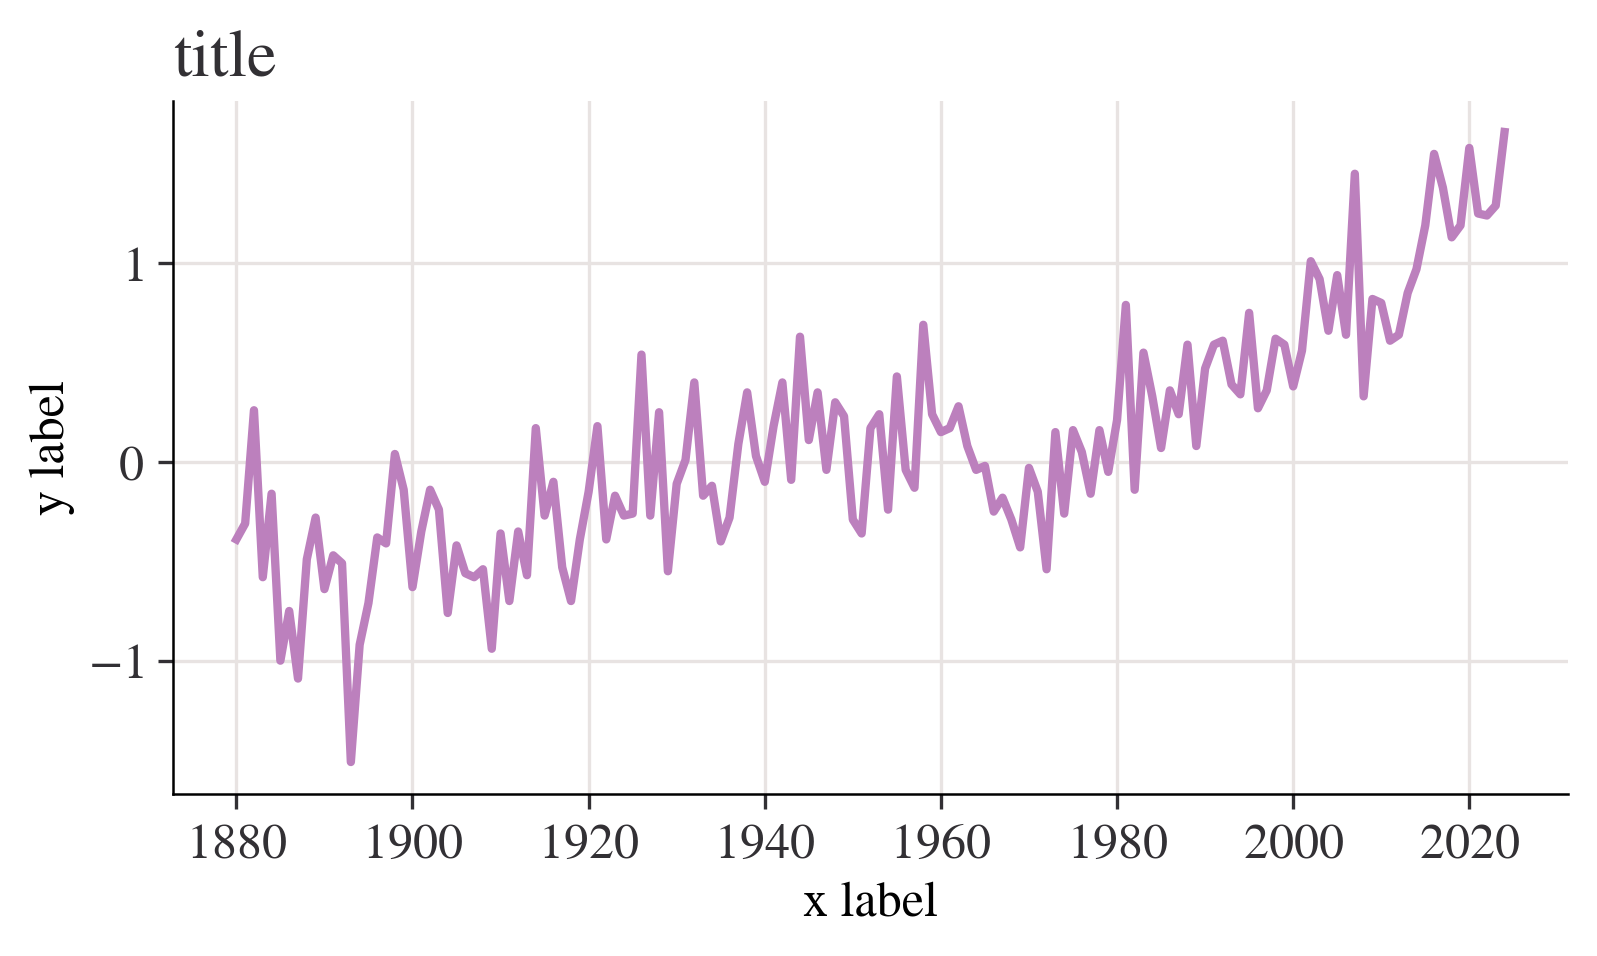

In [27]:

# onto which to put chart elements
fig, ax = plt.subplots()
# select the column to use 'plot' on, and pass the ax object
# note that the horizontal axis is given by the index of the dataframe
df["Jan"].plot(ax=ax)
# set the labels and title
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
# show the plot
plt.show()

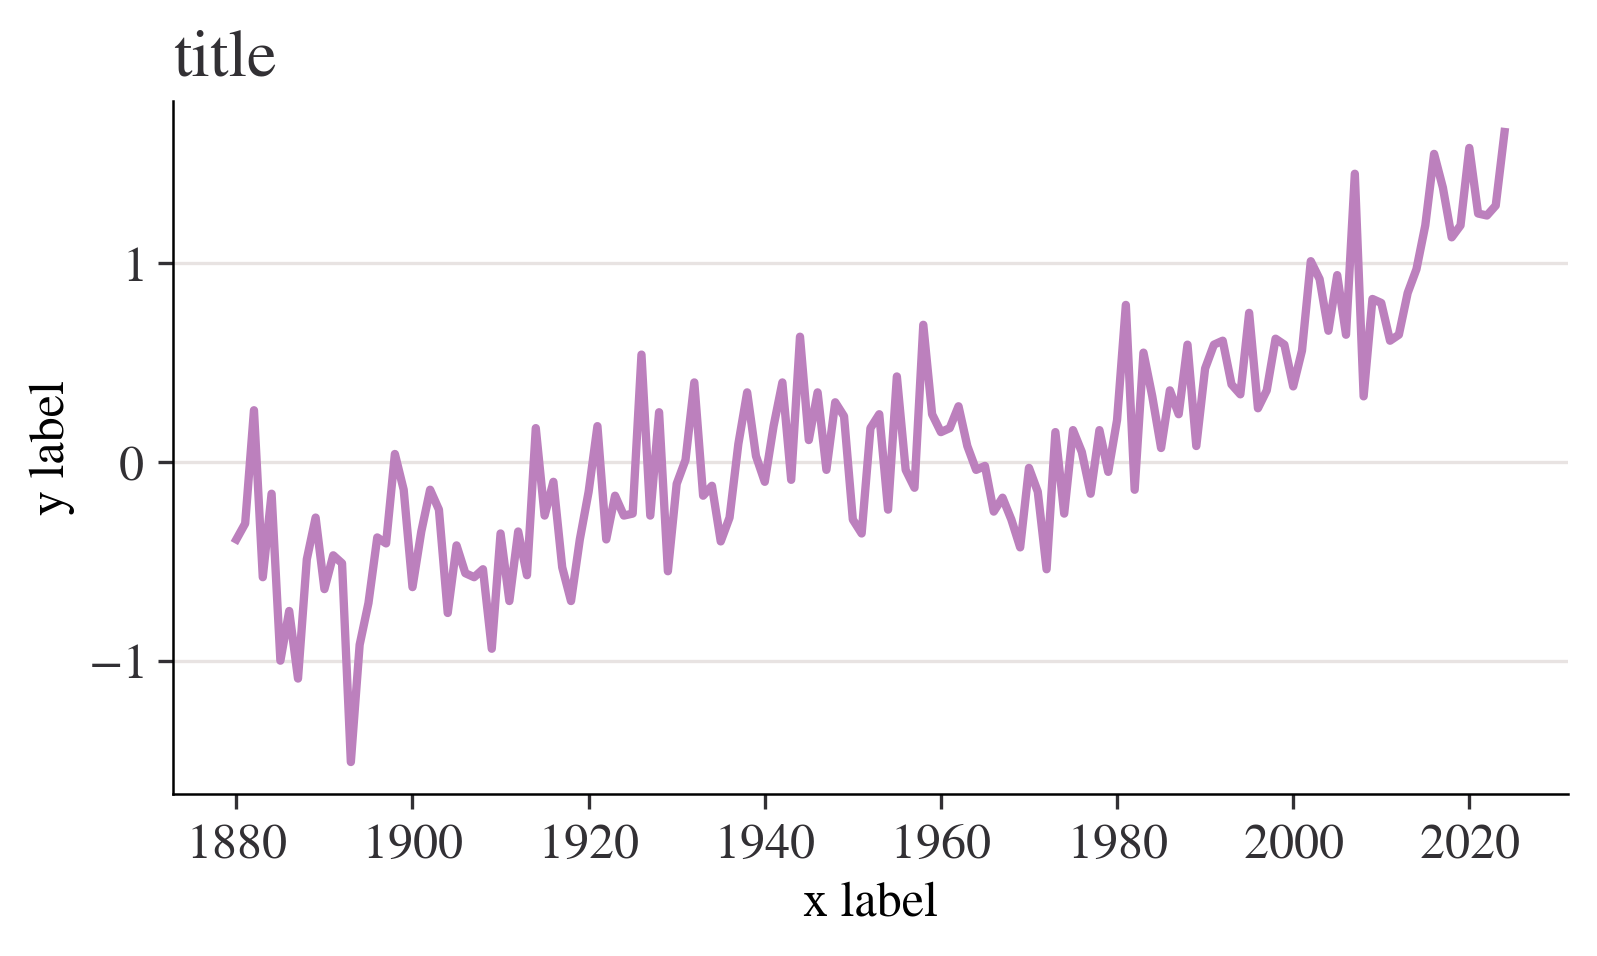

In [28]:

fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

Text(0, 0.5, 'Annual temperature anomalies')

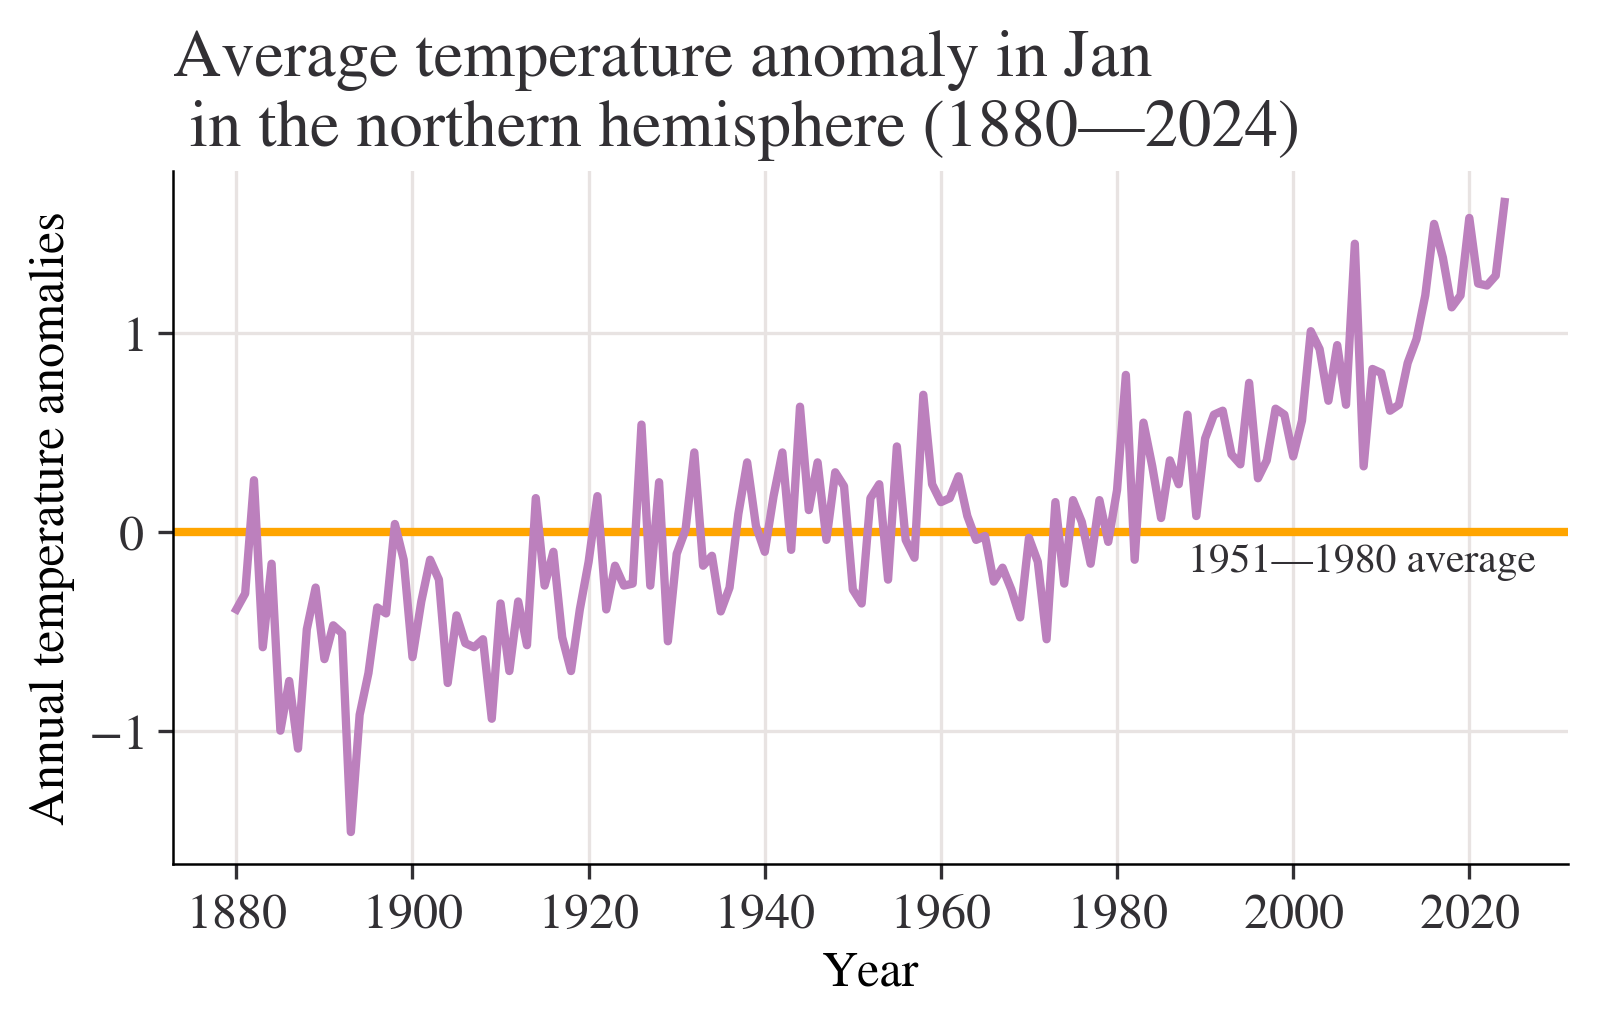

In [29]:

month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

Text(0, 0.5, 'Annual temperature anomalies')

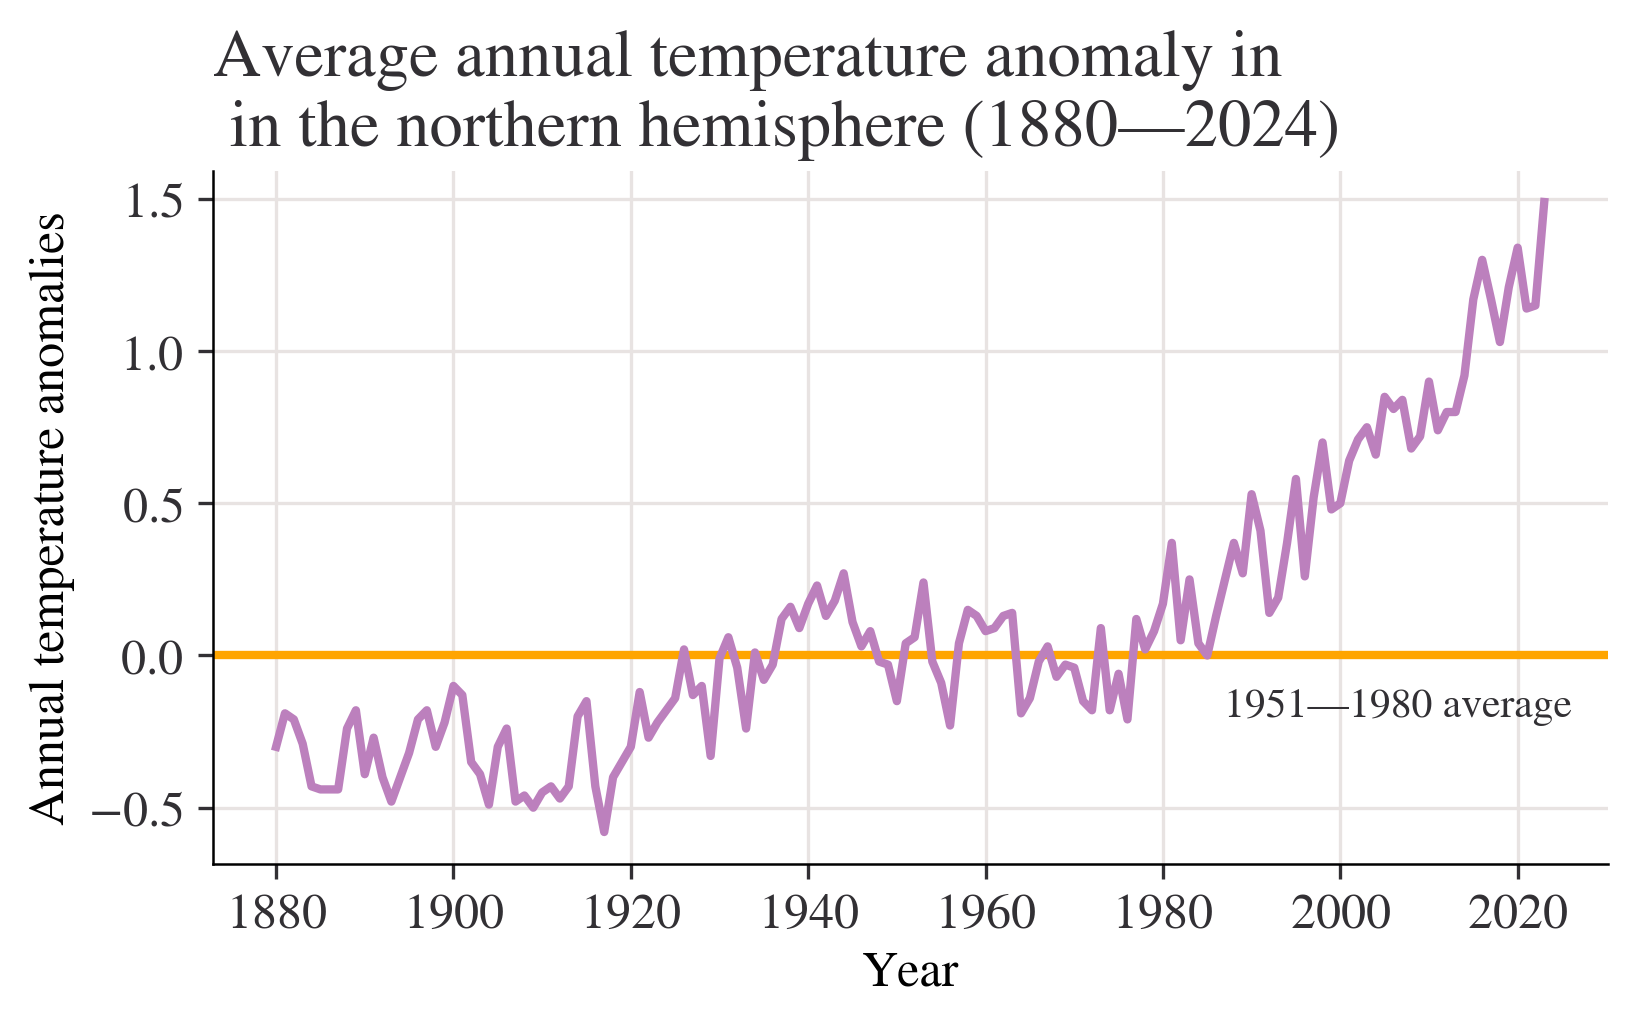

In [30]:

month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")


In [31]:

df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [32]:

df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [33]:

list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()


Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.26
1881  Jun   -0.34
      Jul    0.09
dtype: float64

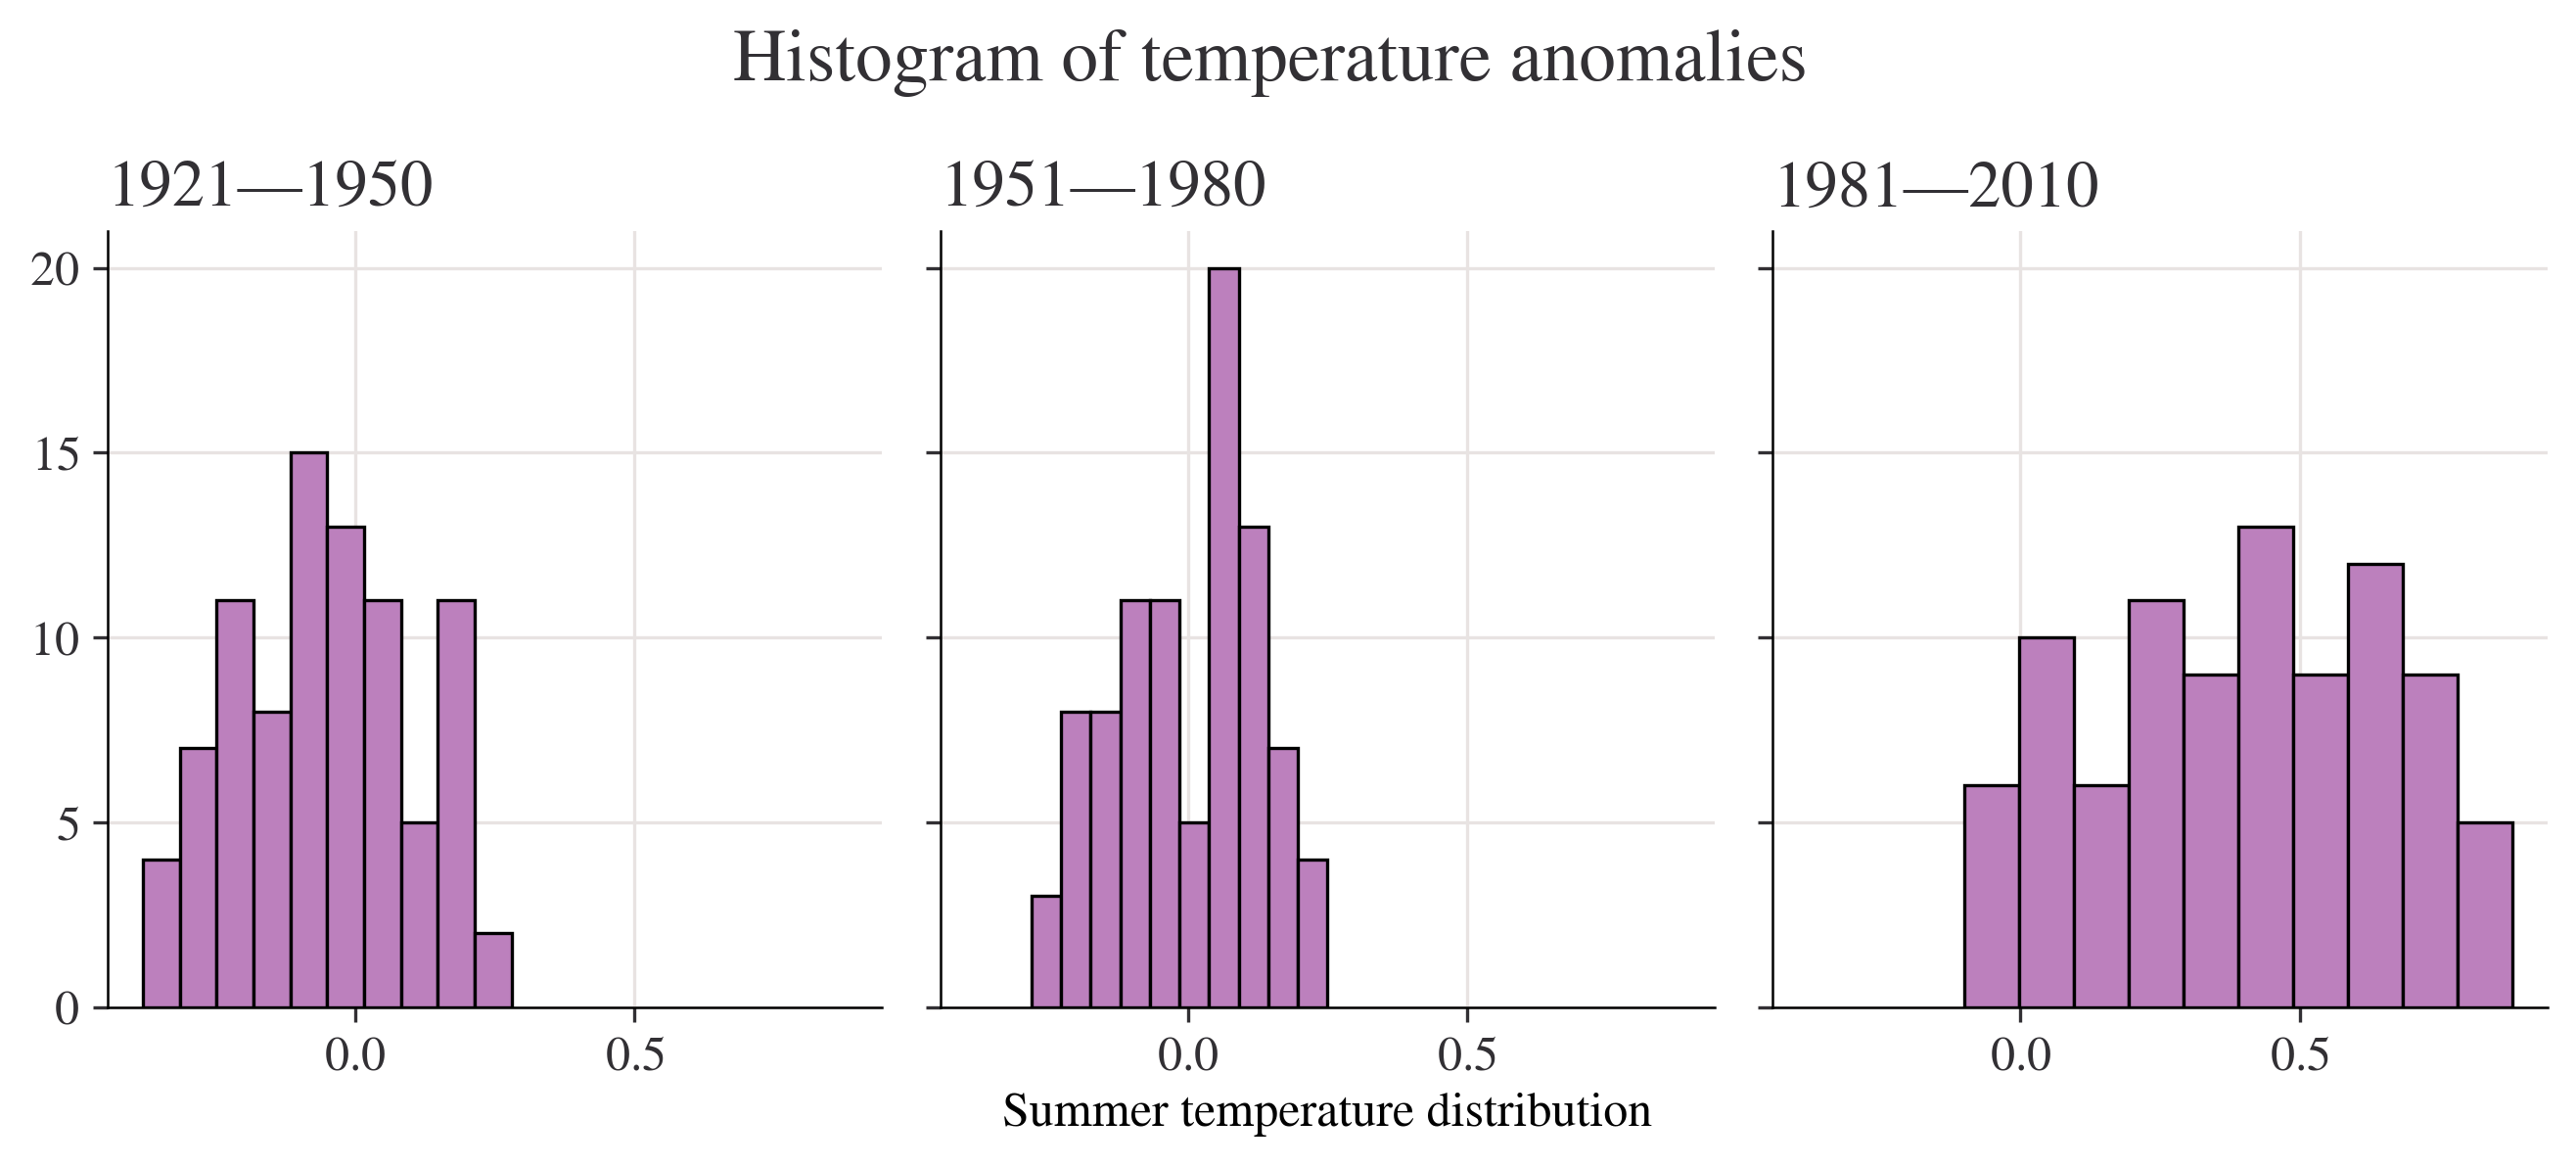

In [34]:

fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout()

In [35]:
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.19
3,1951,Apr,0.07
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.09
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.20


In [36]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)


print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [37]:
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.79
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [40]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
    )

The proportion under -0.1 is 1.94%


In [41]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [42]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [43]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\26768\AppData\Local\Temp\ipykernel_22488\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\26768\AppData\Local\Temp\ipykernel_22488\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x00000269F25A9870> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\26768\AppData\Local\Temp\ipykernel_22488\1563140002.py:1: FutureWarning: The provided callable <function var at 0x00000269F25A9AB0> is currently using SeriesGroupBy.var. In a future version of pandas, the provided call

mean       var
Season Period                       
DJF    1921—1950 -0.027931  0.057703
       1951—1980 -0.003333  0.050375
       1981—2010  0.522000  0.078644
JJA    1921—1950 -0.054483  0.021611
       1951—1980  0.001333  0.014640
       1981—2010  0.399000  0.067775
MAM    1921—1950 -0.041724  0.031136
       1951—1980  0.000333  0.025272
       1981—2010  0.507667  0.075812
SON    1921—1950  0.081379  0.027798
       1951—1980 -0.001333  0.026384
       1981—2010  0.427000  0.110739

In [45]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

In [78]:
import chardet


In [ ]:
### Xu Jie encountered a problem when importing data, 
### Xu Jie realizing that the method is in the back, the front is prompting for the method, 
### the back is assigning a value to the front, and the front doesn't use the body of the method, only the data.
df_co2 = pd.read_csv("data/1_CO2-data.csv")

In [109]:
df_co2 = pd.read_csv("data/1_CO2-data.csv")
df_co2.head()

,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


In [110]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [111]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [112]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [113]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.000000,0.914371
Trend,0.914371,1.000000


In [114]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [115]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)